In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import h5py

In [2]:
start = '2010-01-01'
end = '2022-12-31'

df = data.DataReader('aapl','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430347


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-11,146.639999,143.779999,145.669998,144.869995,63141600.0,144.869995
2022-07-12,148.449997,145.050003,145.759995,145.860001,77588800.0,145.860001
2022-07-13,146.449997,142.119995,142.990005,145.490005,71185600.0,145.490005
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430347


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


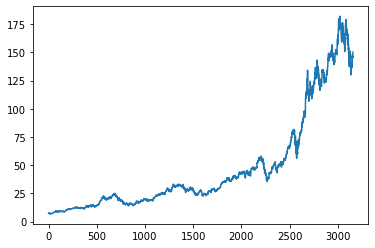

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3151,146.639999,143.779999,145.669998,144.869995,63141600.0
3152,148.449997,145.050003,145.759995,145.860001,77588800.0
3153,146.449997,142.119995,142.990005,145.490005,71185600.0
3154,148.949997,143.250000,144.080002,148.470001,78140700.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3151    155.516600
3152    155.247301
3153    154.976701
3154    154.772601
3155    154.601301
Name: Close, Length: 3156, dtype: float64

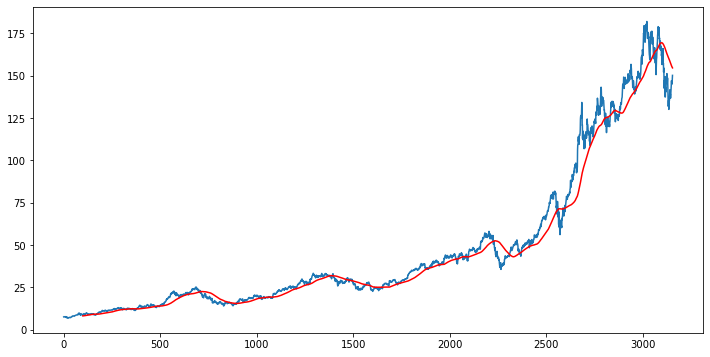

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3151    158.28385
3152    158.27900
3153    158.27185
3154    158.28735
3155    158.32865
Name: Close, Length: 3156, dtype: float64

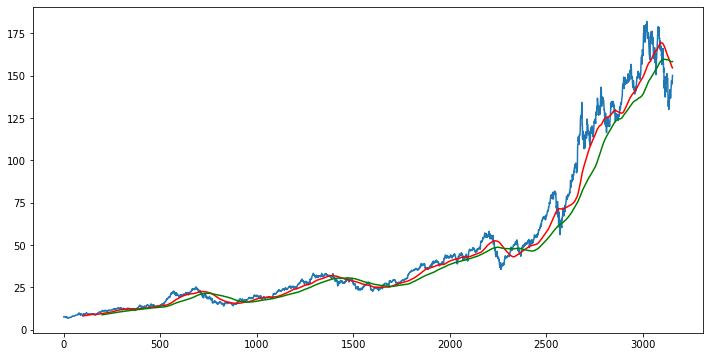

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3156, 5)

In [13]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2209, 1)
(947, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2209,54.090000
2210,53.612499
2211,55.527500
2212,54.340000
2213,55.537498


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.96198089],
       [0.95943982],
       [0.97458875]])

In [19]:
data_training_array.shape

(2209, 1)

In [20]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)    

In [21]:
# MLMODEL


In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

2022-07-16 12:02:18.858434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-16 12:02:18.858468: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))




model.add(Dense(units = 1))


2022-07-16 12:02:20.584180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-16 12:02:20.584216: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-16 12:02:20.584255: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nishkarsh-pc): /proc/driver/nvidia/version does not exist
2022-07-16 12:02:20.584671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs =50)

Epoch 1/50
66/66 [==============================] - 14s 158ms/step - loss: 0.0293
Epoch 2/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0059
Epoch 3/50
66/66 [==============================] - 10s 148ms/step - loss: 0.0058
Epoch 4/50
66/66 [==============================] - 10s 157ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 11s 168ms/step - loss: 0.0042
Epoch 6/50
66/66 [==============================] - 11s 163ms/step - loss: 0.0040
Epoch 7/50
66/66 [==============================] - 11s 170ms/step - loss: 0.0036
Epoch 8/50
66/66 [==============================] - 13s 192ms/step - loss: 0.0040
Epoch 9/50
66/66 [==============================] - 12s 183ms/step - loss: 0.0038
Epoch 10/50
66/66 [==============================] - 12s 182ms/step - loss: 0.0033
Epoch 11/50
66/66 [==============================] - 12s 183ms/step - loss: 0.0032
Epoch 12/50
66/66 [==============================] - 12s 187ms/step - loss: 0.0032
Epoch 13/50
6

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2209,54.090000
2210,53.612499
2211,55.527500
2212,54.340000
2213,55.537498


In [28]:
data_training.tail(100)

,Close
2109,46.577499
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498
...,...
2204,58.017502
2205,56.997501
2206,56.072498
2207,55.942501


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/tmp/ipykernel_19228/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [31]:
final_df.head()

,Close
0,46.577499
1,46.907501
2,46.790001
3,47.090000
4,47.037498


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07530937],
       [0.07756252],
       [0.07676027],
       ...,
       [0.75065296],
       [0.77099944],
       [0.78260649]])

In [33]:
input_data.shape

(1047, 1)

In [34]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [35]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(947, 100, 1)
(947,)


In [36]:
# making predictions

y_predicted = model.predict(x_test)

30/30 [==============================] - 2s 43ms/step


In [37]:
y_predicted.shape

(947, 1)

In [38]:
y_test

array([0.12660237, 0.12334215, 0.13641717, 0.1283093 , 0.13648544,
       0.13484681, 0.12602203, 0.13163779, 0.13392506, 0.13747546,
       0.12443458, 0.13247419, 0.12649996, 0.11956987, 0.1213792 ,
       0.13086968, 0.13660494, 0.1114449 , 0.10139113, 0.10511224,
       0.115661  , 0.11316891, 0.10630708, 0.08872578, 0.08541435,
       0.07614578, 0.08401469, 0.08763335, 0.07454126, 0.05938379,
       0.05904241, 0.05137833, 0.05535546, 0.05470684, 0.06614321,
       0.06377059, 0.06211488, 0.07276608, 0.0588888 , 0.05552616,
       0.04489204, 0.04678673, 0.04513101, 0.04593327, 0.04909106,
       0.03975419, 0.03712555, 0.0407613 , 0.03191943, 0.02498933,
       0.0145771 , 0.00792012, 0.02556968, 0.02382861, 0.02396517,
       0.02654264, 0.02684987, 0.        , 0.010361  , 0.00979771,
       0.01461125, 0.01898096, 0.01981736, 0.01723989, 0.01333105,
       0.01857132, 0.02176325, 0.02333362, 0.02497227, 0.0189639 ,
       0.02002218, 0.01793974, 0.02657676, 0.02408467, 0.02131

In [39]:
y_predicted

array([[0.19285919],
       [0.19377685],
       [0.1944251 ],
       [0.19476727],
       [0.19477764],
       [0.19450557],
       [0.1940192 ],
       [0.19334516],
       [0.1925367 ],
       [0.19166413],
       [0.19081268],
       [0.18998434],
       [0.18920355],
       [0.1884612 ],
       [0.18770769],
       [0.18690692],
       [0.1860905 ],
       [0.18533628],
       [0.18458885],
       [0.18373398],
       [0.18268976],
       [0.1814653 ],
       [0.1800981 ],
       [0.17861   ],
       [0.17695233],
       [0.17507312],
       [0.17291532],
       [0.17049368],
       [0.16788578],
       [0.165136  ],
       [0.1622349 ],
       [0.15918608],
       [0.15599218],
       [0.15268515],
       [0.14933486],
       [0.1460773 ],
       [0.14301918],
       [0.14022774],
       [0.13778256],
       [0.13567755],
       [0.13386273],
       [0.13224539],
       [0.13074917],
       [0.12931909],
       [0.12792698],
       [0.12657766],
       [0.1252563 ],
       [0.123

In [40]:
scaler.scale_

array([0.00682769])

In [41]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

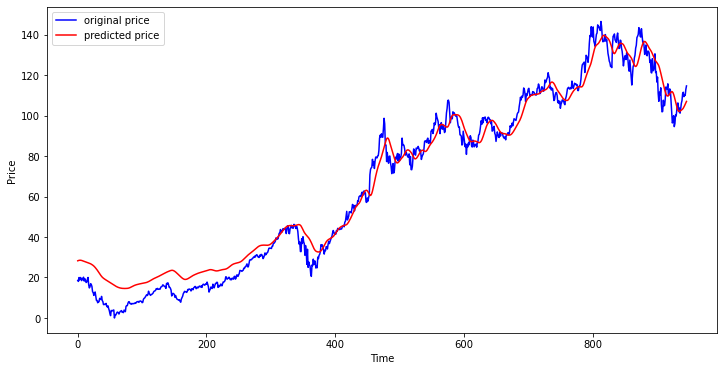

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'original price')
plt.plot(y_predicted,'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()